# 4. Intro to Exploratory Data Analysis

In the last chapter, we learned about loading data into R and practiced selecting and summarizing columns and rows of the data. In this chapter, we will learn how to conduct more exploratory analysis, focusing on the univariate and bivariate sample distributions of the data. The first half focuses on using base R to create basic plots and summaries. In the second half, we show how to create summary plots using the `GGally` package and tables using the `gt` and `gtsummary` packages.

In [1]:
suppressPackageStartupMessages(library(RforHDSdata))
suppressPackageStartupMessages(library(GGally)) 
suppressPackageStartupMessages(library(gt))
suppressPackageStartupMessages(library(gtsummary))

## Univariate Distributions

In this chapter, we will use a sample of the National Health and Nutrition Examination Survey ([NHANES](https://www.cdc.gov/nchs/nhanes/index.htm)) containing lead, blood pressure, BMI, smoking status, alcohol use, and demographic variables from NHANES 1999-2018. There are 31,625 observations in this sample. Use the help operator `?NHANESsample` to read the column descriptions.

In [2]:
data(NHANESsample)
dim(NHANESsample)
names(NHANESsample)

[1] 31265    21

[1] "ID"            "AGE"           "SEX"           "RACE"         
 [5] "EDUCATION"     "INCOME"        "SMOKE"         "YEAR"         
 [9] "LEAD"          "BMI_CAT"       "LEAD_QUANTILE" "HYP"          
[13] "ALC"           "DBP1"          "DBP2"          "DBP3"         
[17] "DBP4"          "SBP1"          "SBP2"          "SBP3"         
[21] "SBP4"

To start our exploration, we will look at whether there are any missing values. We use the `complete.cases()` function to observe that there are no complete cases. We also see that the subsequent blood pressure measurements and alcohol use have the highest percentage of missing values. For demonstration, we choose to only keep the first systolic an diastolic blood pressure measurements and do a complete case analysis using the `na.omit()` function to define our complete data frame `nhanes_df`. 

In [3]:
sum(complete.cases(NHANESsample))
apply(NHANESsample, 2, function(x) sum(is.na(x)))/nrow(NHANESsample)

[1] 0

ID           AGE           SEX          RACE     EDUCATION 
 0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0006716776 
       INCOME         SMOKE          YEAR          LEAD       BMI_CAT 
 0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0000000000 
LEAD_QUANTILE           HYP           ALC          DBP1          DBP2 
 0.0000000000  0.0000000000  0.0268671038  0.0600351831  0.0639053254 
         DBP3          DBP4          SBP1          SBP2          SBP3 
 0.0709739325  0.8911242604  0.0600351831  0.0639053254  0.0709419479 
         SBP4 
 0.8911242604

In [4]:
nhanes_df <- na.omit(subset(NHANESsample, 
                            select= -c(SBP2, SBP3, SBP4, DBP2, DBP3, DBP4)))

In the last chapter, we introduced the `table()` and `summary()` functions to quickly summarize categorical and quantitative vectors. 

In [5]:
table(nhanes_df$SMOKE)
summary(nhanes_df$YEAR)


NeverSmoke  QuitSmoke StillSmoke 
     13774       8019       6799 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1999    2003    2007    2008    2011    2017 

We decide to select the most recent observations from NHANES 2017-2018 for our analysis in this chapter. We use the `subset()` function to select these rows. 

In [6]:
nhanes_df <- subset(nhanes_df, nhanes_df$YEAR==2017)

As shown above, smoking status has been coded into three categories: "NeverSmoke", "QuitSmoke", and "StillSmoke". We want to create a new column to represent whether someone has ever smoked. To do so, we use the `ifelse()` function, which allows us to create a new vector using logic. The logic captured by this function is that we will take one value if we meet some condition(s) and we will take a second value otherwise. The first argument is a vector of TRUE/FALSE values representing the conditions, the next argument is the value to use if we meet the condition(s), and the last argument is the value to use otherwise. We use this function to create a new vector `EVER_SMOKE` that is equal to "Yes" for those who are either still smoking or quit smoking and equal to "No" otherwise. 

In [7]:
nhanes_df$EVER_SMOKE <- ifelse(nhanes_df$SMOKE %in% c("QuitSmoke", "StillSmoke"), 
                               "Yes", "No")
table(nhanes_df$EVER_SMOKE)


  No  Yes 
1411 1173 

The `summary()` and `table()` functions allow us to summarize the univariate sample distributions of columns. We may also want to plot these distributions. We saw in the [last chapter](https://alicepaul.github.io/r-for-health-data-science/book/3_data_files.html) that the `hist()` function creates a histogram plot. Below we use this function to plot a histogram of the log transformation of the lead column.

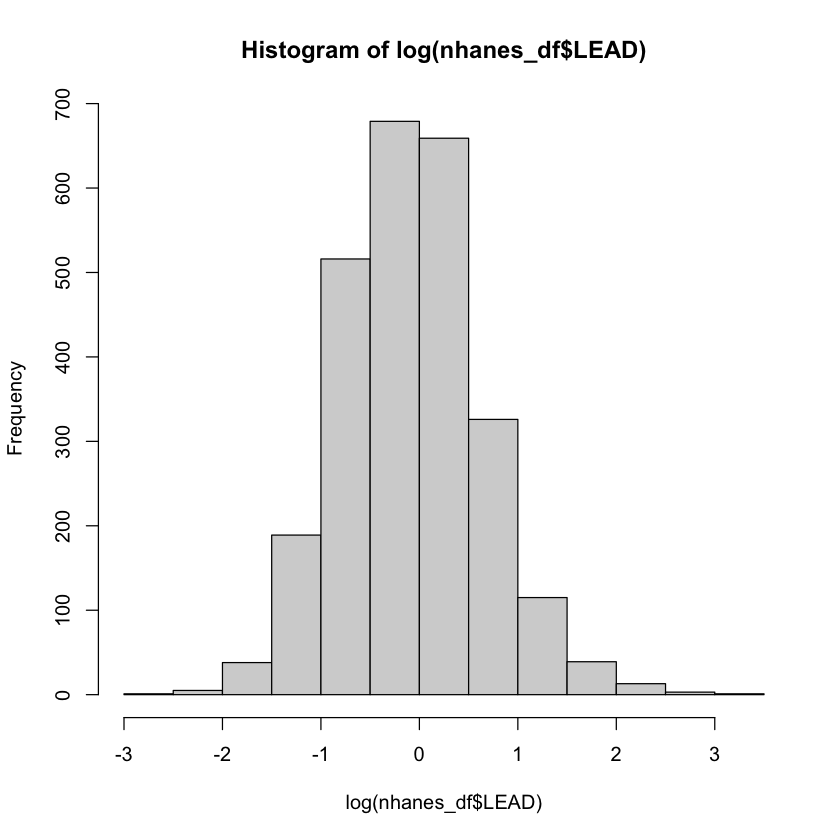

In [8]:
hist(log(nhanes_df$LEAD))

If we want to polish this figure, we can use some of the other optional arguments to the `hist()` function.  For example, we may want to update the text `log(nhanes_df$lead)` in the title and x-axis. Below, we update the [color](http://www.stat.columbia.edu/~tzheng/files/Rcolor.pdf), labels, and number of bins for the plot. The argument `breaks` specifies the number of bins to use to create the histogram, `col` specifies the color, `main` specifies the title of the plot, and `xlab` specifies the x-axis label (using `ylab` would specify the y-axis label). Read the documentation `?hist` for the full list of arguments available.

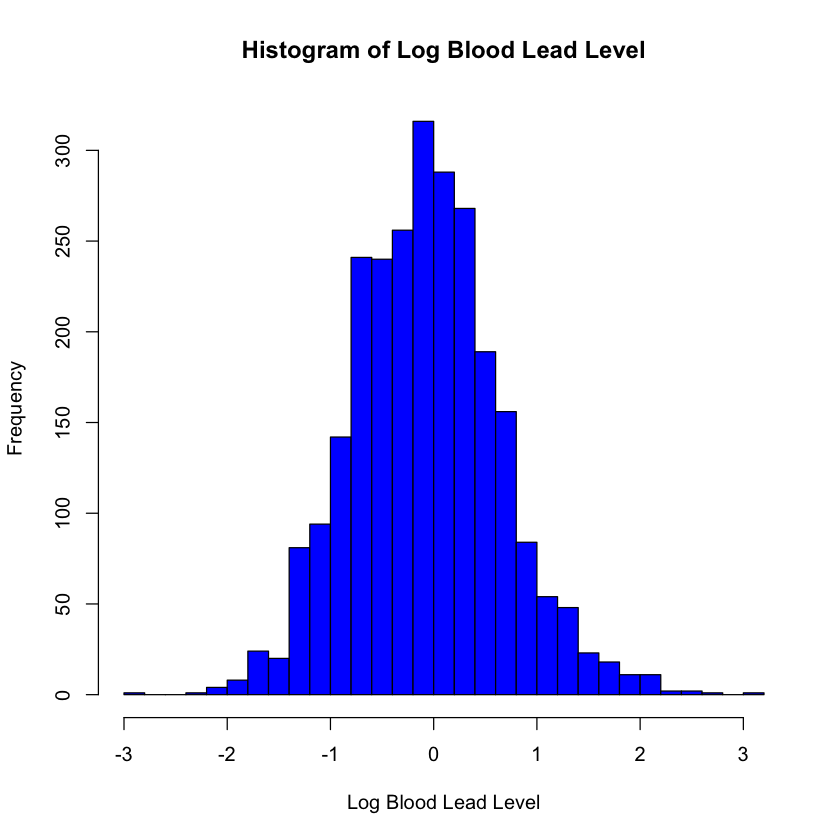

In [9]:
hist(log(nhanes_df$LEAD), breaks = 30, col="blue", 
     main="Histogram of Log Blood Lead Level",
     xlab="Log Blood Lead Level")

For categorical columns, we may want to plot the counts in each category using a bar plot. The function `barplot()` asks us to specify the `names` and `heights` of the bars. To do so, we will need to store the counts for each category. Again, we update the color and labels.

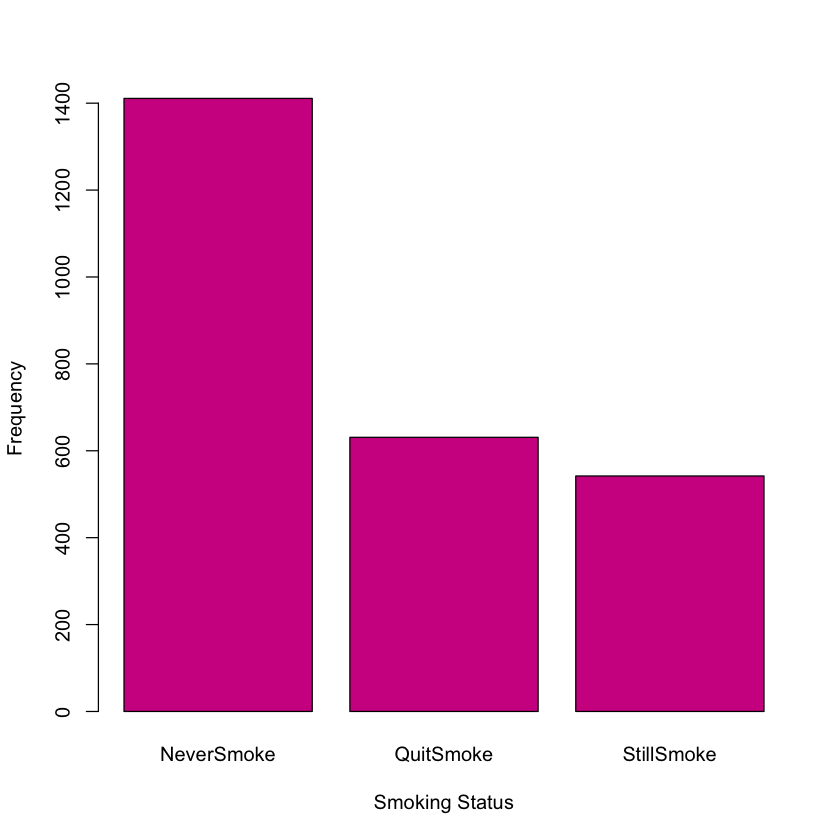

In [10]:
smoke_counts <- table(nhanes_df$SMOKE)
barplot(height=smoke_counts, names=names(smoke_counts), col="violetred",
       xlab="Smoking Status", ylab="Frequency")

With a bar plot, we can even specify a different color for each bar. To do so, `col` must be a vector of specified colors with the same length as the number of categories.

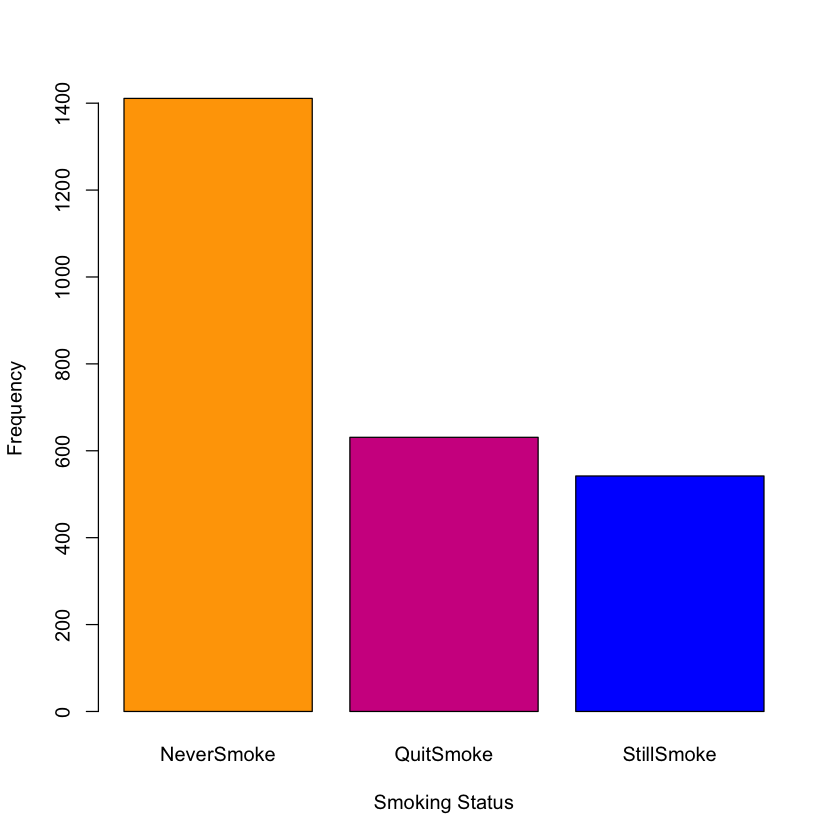

In [11]:
barplot(height=smoke_counts, names=names(smoke_counts), 
        col=c("orange","violetred","blue"),
        xlab="Smoking Status", ylab="Frequency")

### Practice Question

Recreate the following barplot of the percentage of values in each `LEAD_QUANTILE` category: 
<img src="images/4-practicequestion1answer.png" alt= “” width="300pt" align="center">

In [12]:
# Insert your solution here:

## Bivariate Distributions

We now turn our attention to relationships among multiple columns. When we have two categorical columns, we can use the `table()` function to find the counts across all combinations. For example, below we look at the distribution of smoking status levels by sex. We observe that a higher percentage of female participants have never smoked.

In [13]:
table(nhanes_df$SMOKE, nhanes_df$SEX)

            
             Male Female
  NeverSmoke  596    815
  QuitSmoke   390    241
  StillSmoke  324    218

To look at the sample distribution of a continuous column stratified by a cateogrical column, we could call the `summary()` function for each subset of the data. Below we look at the distribution of blood lead level by sex. 

In [14]:
summary(nhanes_df$LEAD[nhanes_df$SEX=="Female"])
summary(nhanes_df$LEAD[nhanes_df$SEX=="Male"])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.100   0.470   0.770   0.977   1.208   8.670 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.050   0.700   1.090   1.461   1.660  22.010 

We could also observe this visually through a box plot. When given one categorical column and one continuous column, the `plot()` function creates a box plot. By default, the first argument is the x-axis and second argument is the y-axis. 

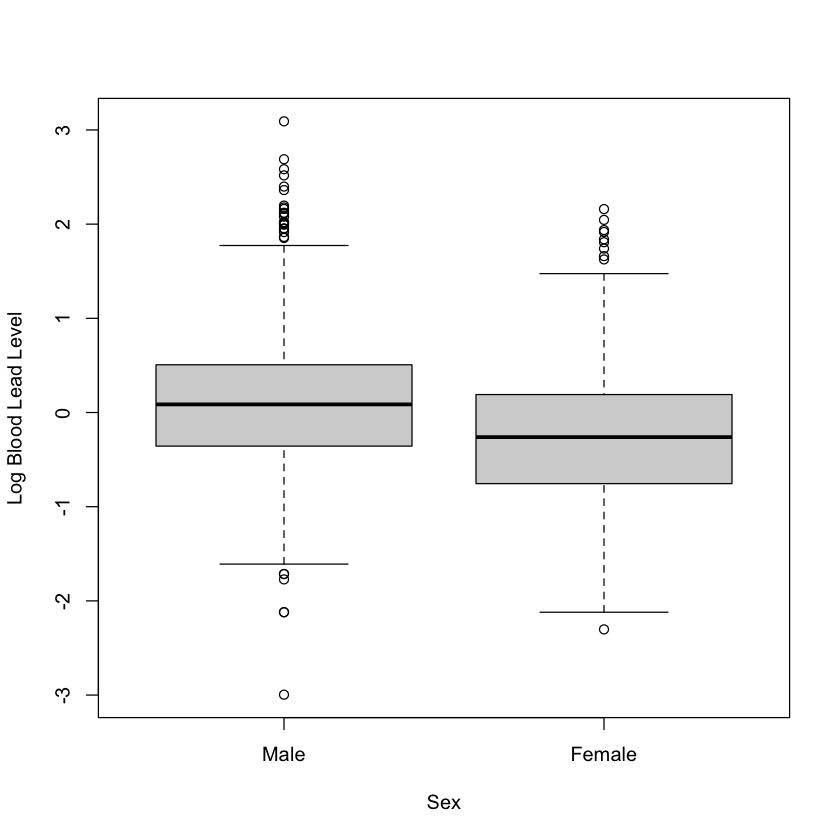

In [15]:
plot(nhanes_df$SEX, log(nhanes_df$LEAD), ylab="Log Blood Lead Level", xlab="Sex")

Alternatively, we could use the `boxplot()` function, which can be passed a formula. A formula is a string representation of how to group the data, where the left hand side is the continuous column and the right hand side is one or more categorical columns to group by. In the case below, we group by multiple columns, `SEX` and `EVER_SMOKE`, so our formula is `log(LEAD)~SEX+EVER_SMOKE`. The second argument to the function specifies the data.  We specify the column colors to show the link between the box plots shown. 

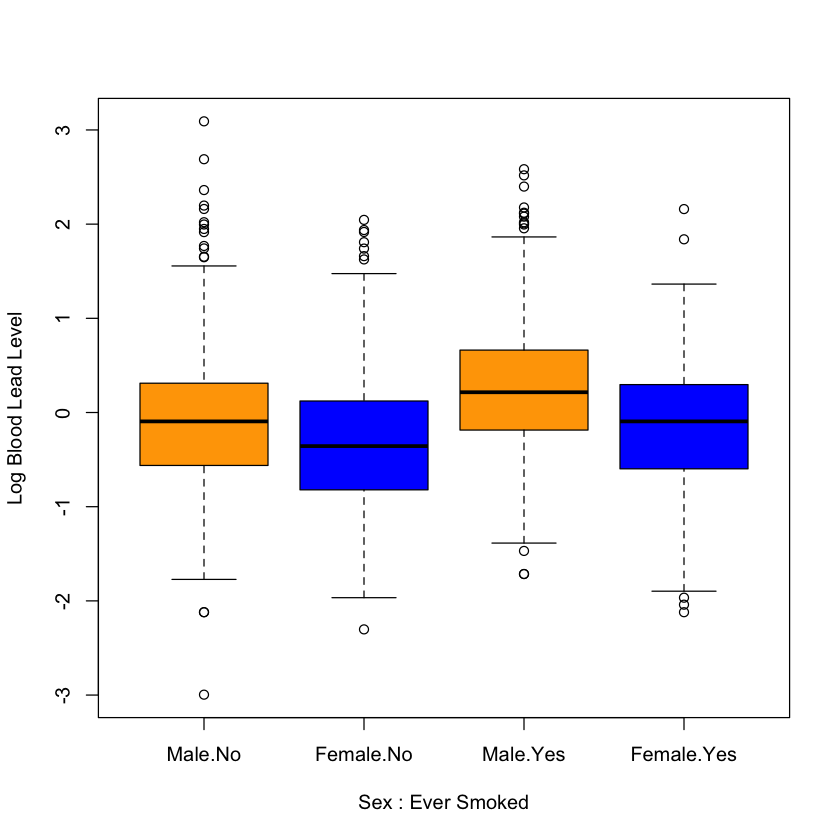

In [16]:
boxplot(log(LEAD)~SEX+EVER_SMOKE, data=nhanes_df, 
        col=c("orange", "blue", "orange", "blue"),
        xlab="Sex : Ever Smoked", ylab = "Log Blood Lead Level")

To visualize the bivariate distributions between two continuous columns, we can use scatter plots. To create a scatter plot, we use the `plot()` function again. Below, we use this function to show the relationship between systolic and diastolic blood pressure. 

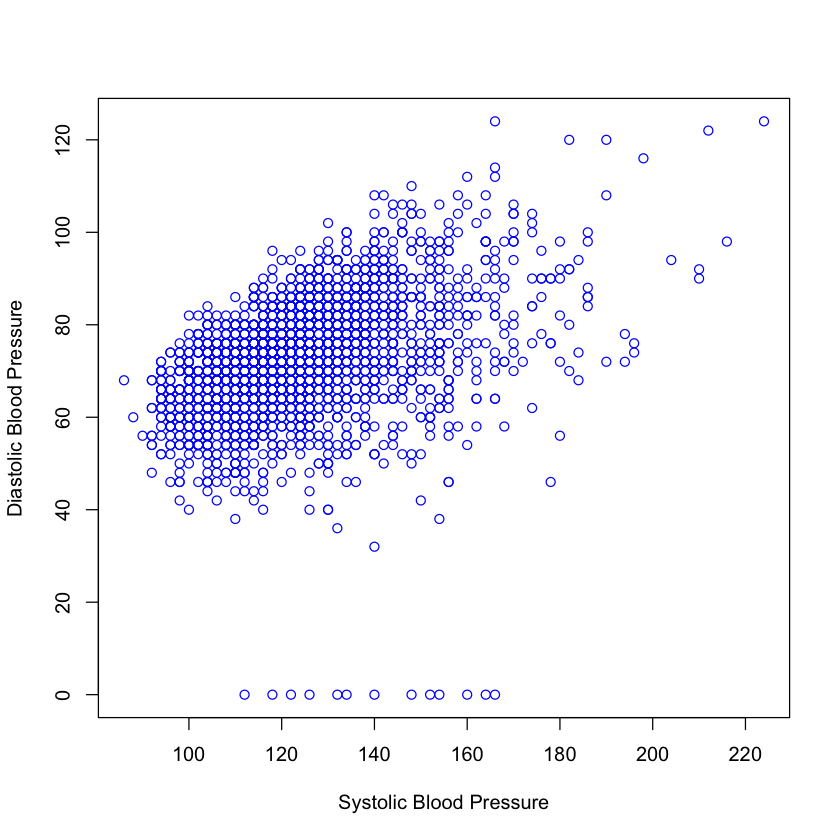

In [17]:
plot(nhanes_df$SBP1, nhanes_df$DBP1, col="blue", xlab="Systolic Blood Pressure",
    ylab="Diastolic Blood Pressure")

The two measures of blood pressure look highly correlated. We can calculate their Pearson and Spearman correlation using the `cor()` function. The default method is the Pearson correlation, but we can also calculate the Kendall or Spearman correlation by specifying the method. 

In [18]:
cor(nhanes_df$SBP1, nhanes_df$DBP1)
cor(nhanes_df$SBP1, nhanes_df$DBP1, method="spearman")

[1] 0.4166796

[1] 0.4711908

We may also want to add some extra information to our plot above. This time, instead of specifying the color manually, we use the column `hyp`, an indicator for hypertension, to specify the color. We have to make sure this vector is a factor for R to color by group. Additionally, we add a blue vertical and horizontal line using the `abline()` function to mark cutoffs for hypertension. Even though this function is called after `plot()`, the lines are automatically added to the current plot.

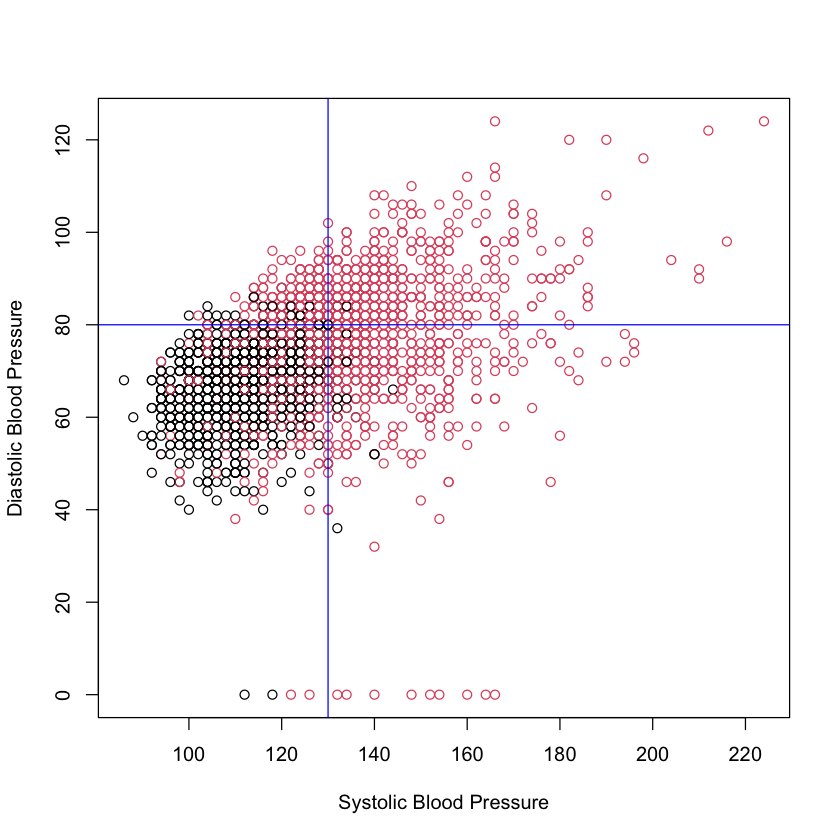

In [19]:
plot(nhanes_df$SBP1, nhanes_df$DBP1, col=as.factor(nhanes_df$HYP), 
     xlab="Systolic Blood Pressure",
     ylab="Diastolic Blood Pressure")
abline(v=130, col="blue")
abline(h=80, col="blue")

The plots above are all displayed as a single figure. If we want to display multiple plots next to each other, we can specify the graphical parameters using the `par()` function by updating the argument `mfrow=c(nrow, ncol)` with the number of columns and rows we would like to use for our figures. Below, we use this to display the distribution of log blood lead level between those with and without hypertension next to the plot from above. 

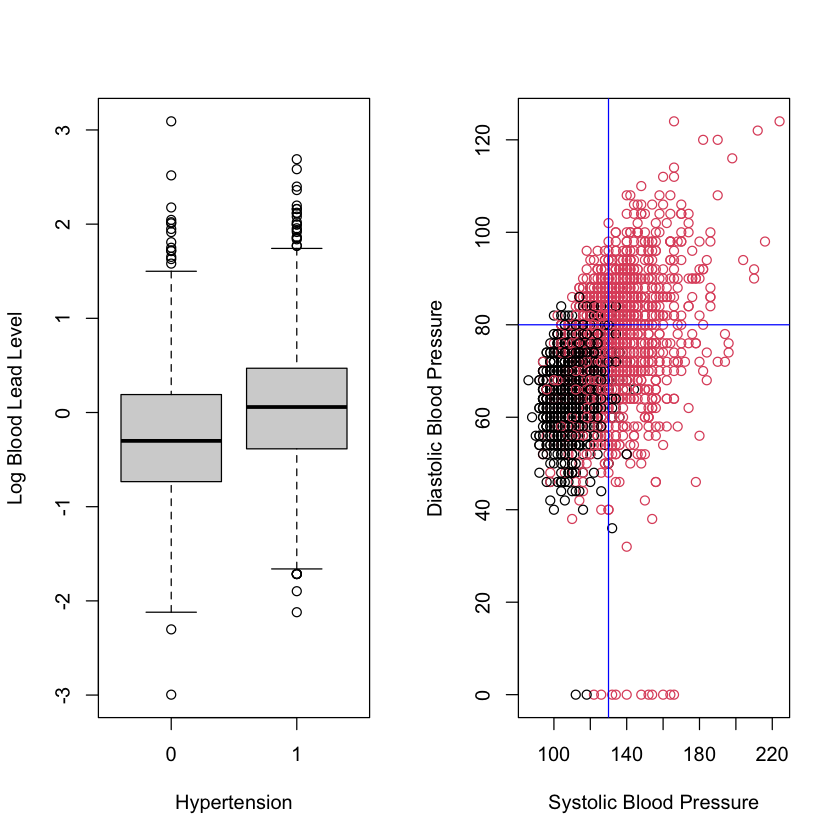

In [20]:
par(mfrow=c(1,2))

# boxplot
boxplot(log(LEAD)~HYP, data=nhanes_df, xlab="Hypertension", ylab="Log Blood Lead Level")

# scatterplot
plot(nhanes_df$SBP1, nhanes_df$DBP1, col=as.factor(nhanes_df$HYP), 
     xlab="Systolic Blood Pressure",
     ylab="Diastolic Blood Pressure")
abline(v=130, col="blue")
abline(h=80, col="blue")

We then reset to only display a single plot for future images using the `par()` function again.

In [21]:
par(mfrow=c(1,1))

### Practice Question

Recreate these three boxplots (one for each education level) of income by BMI category and arrange them next to each other using the par() function.

<img src="images/4-practicequestion2answer.png" alt= “” width="400pt" align="center">

In [22]:
# Insert your solution here:

## Autogenerated Plots

Above, we learned some new functions for visualizing the relationship between columns. The `GGally` package contains some useful functions for looking at multiple univariate and bivariate relationships at the same time, such as the `ggpairs()` function. `ggpairs()` takes the data as its first argument. By default, it will plot the pairwise distributions for all columns, but we can also specify to only select a subset of columns using the `columns` argument. You can see below that it plots bar plots and density plots for each univariate sample distribution. It then plots the bivariate distributions and calculates the Pearson correlation for all pairs of continuous columns. That's a lot of information!

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


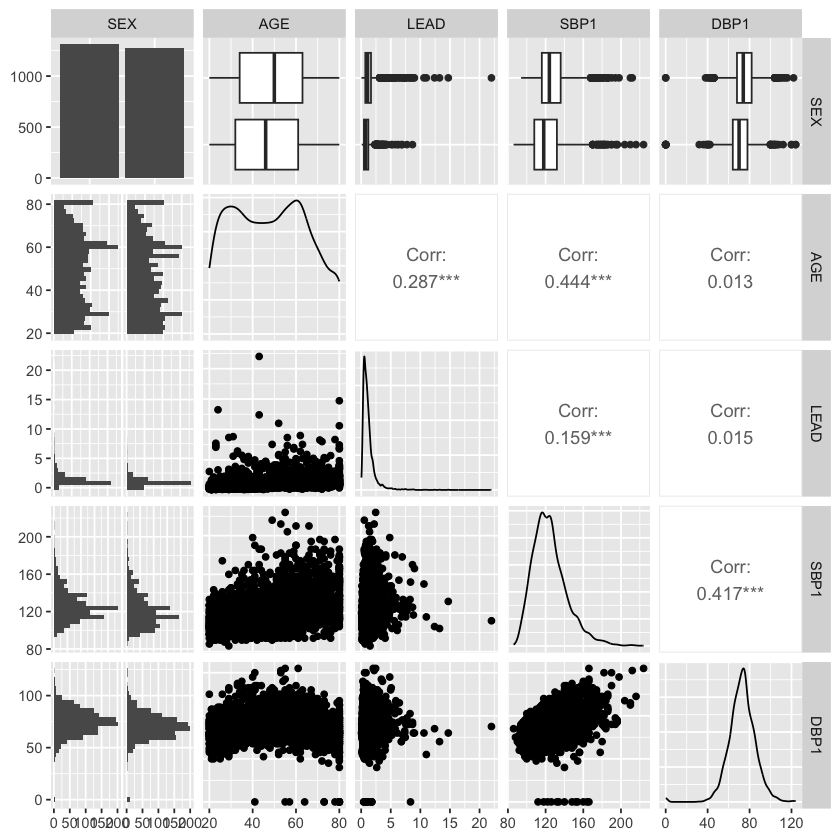

In [23]:
ggpairs(nhanes_df, columns = c("SEX", "AGE", "LEAD", "SBP1", "DBP1"))

Another useful function in this package is the `ggcorr()` function: this function takes in a data frame with only numeric columns and displays the correlation between all pairs of columns, where the color of each grid cell indicates the strength of the correlation. The additional argument `label=TRUE` prints the actual correlation value on each grid cell. This is a useful way to identify pairs of strongly correlated columns. 

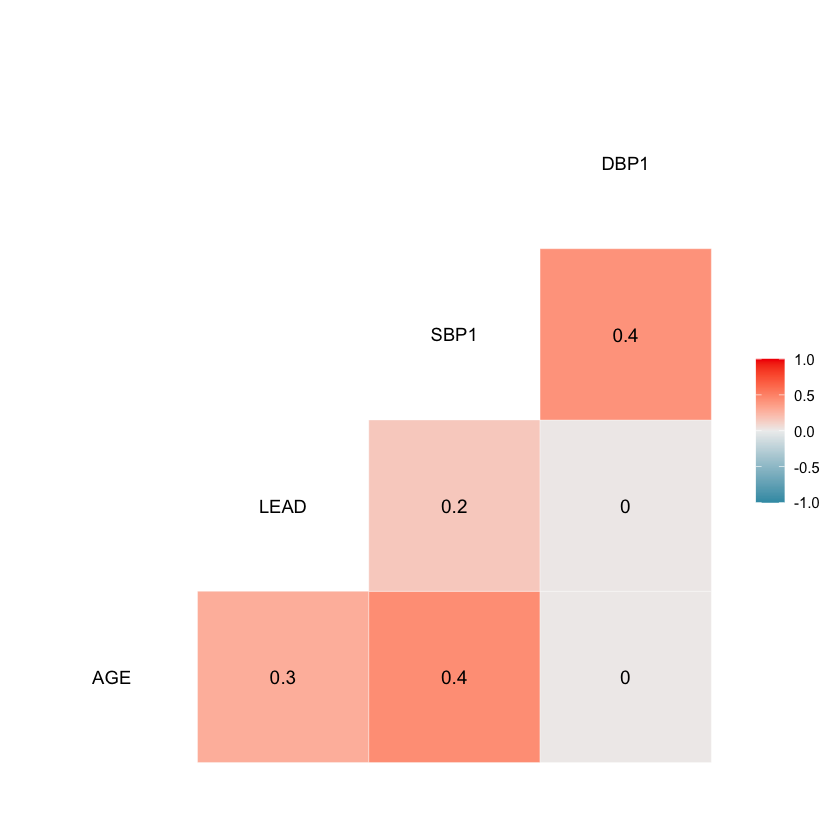

In [24]:
nhanes_cont <- nhanes_df[,c("AGE", "LEAD", "SBP1", "DBP1")]
ggcorr(nhanes_cont, label=TRUE)

## Tables

Another useful way to display information about your data is through tables. For example, it is standard practice in articles to have the first table in the paper give information about the study sample, such as the mean and standard deviation for all continuous columns and the proportions for categorical columns. The `gt` package is designed to create polished tables that can include footnotes, titles, column labels, etc. The `gtsummary` package is an extension of this package that can create summary tables. We will focus on the latter but come back to creating nice tables in [Chapter 12](https://alicepaul.github.io/r-for-health-data-science/book/12_rmarkdown_reports.html).

To start, we create a gt object (a special type of table) of the first six rows of our data using the `gt()` function. In R Markdown, the table would be displayed nicely. Since we are using this within a Jupyter notebook, however, we need to pass this to another function to make sure it displays correctly as HTML. The pipe operator `%>%` passes the result on the left hand side as the first argument to the function on the right hand side. You can see the difference in the formatting as opposed to printing the data.

In [25]:
gt(head(nhanes_df)) %>% gt:::as.tags.gt_tbl()

ID,AGE,SEX,RACE,EDUCATION,INCOME,SMOKE,YEAR,LEAD,BMI_CAT,LEAD_QUANTILE,HYP,ALC,DBP1,SBP1,EVER_SMOKE
93711,56,Male,Other Race,MoreThanHS,5.00,NeverSmoke,2017,2.15,BMI<=25,Q3,0,Yes,68,108,No
93713,67,Male,Non-Hispanic White,HS,2.65,StillSmoke,2017,3.71,BMI<=25,Q4,0,Yes,70,104,Yes
93716,61,Male,Other Race,MoreThanHS,5.00,QuitSmoke,2017,1.99,BMI>=30,Q3,0,Yes,72,120,Yes
93717,22,Male,Non-Hispanic White,HS,1.49,StillSmoke,2017,1.93,BMI<=25,Q3,0,Yes,62,116,Yes
93721,60,Female,Mexican American,LessThanHS,3.04,NeverSmoke,2017,0.75,BMI>=30,Q1,1,Yes,68,132,No
93722,60,Female,Non-Hispanic White,MoreThanHS,2.07,NeverSmoke,2017,0.98,BMI<=25,Q2,0,Yes,68,116,No


We will now show you how to use the `tbl_summary()` function in the `gtsummary` package. The first argument to this function is again the data frame. By default, this function will summarize all the columns in the data. Instead, we use the `include` argument to specify a list of columns to include. We then pipe this result to `as_gt()` which creates a gt table from the summary output before passing this output to the last function again to display the HTML table. Note that the table computes the total number of observations and the proportions for categorical columns and the median and interquartile range for continuous columns.

In [26]:
tbl_summary(nhanes_df, include= c("SEX", "RACE", "AGE", "EDUCATION", "SMOKE",
                                  "BMI_CAT", "LEAD", "SBP1", "DBP1", "HYP")) %>% 
  as_gt() %>% 
  gt:::as.tags.gt_tbl()

Shiny tags cannot be represented in plain text (need html)

We can update our table by changing some of its arguments. This time, we specify that we want to stratify our table by hypertension status so that the table summarizes the data by this grouping. Additionally, we change how continuous columns are summarized by specifying that we want to report the mean and standard deviation instead of the median and interquartile range. We do this using the `statistic` argument. The documentation for the `tbl_summary()` function can help you format this argument depending on which statistics you would like to display.

In [27]:
tbl_summary(nhanes_df, include= c("SEX", "RACE", "AGE", "EDUCATION", "SMOKE",
                                  "BMI_CAT", "LEAD", "SBP1", "DBP1", "HYP"),
           by = "HYP", statistic = list(all_continuous() ~ "{mean} ({sd})")) %>% 
  as_gt() %>% 
  gt:::as.tags.gt_tbl()

Shiny tags cannot be represented in plain text (need html)

## Recap Video

<div class="video-container">
    <iframe width="700" height="500" src="https://www.youtube.com/embed/Kdc6x-bDfso" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>
</div>

## Exercises

For these exercises, we will continue using the **NHANES** data.

1. Using both numerical and graphical summaries, describe the distribution of the first diastolic blood pressure reading `DBP1`among study participants. Then, create a column called `INCOME_CAT` with two categories: "low" for those whose income is at most 2 and "not low" otherwise and examine the bivariate distribution of `DBP1` and `INCOME_CAT`. Arrange the two plots next to each other. What do you notice?

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   66.00   72.00   72.79   80.00  124.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   64.00   72.00   72.51   80.00  124.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0      66      74      73      80     120 

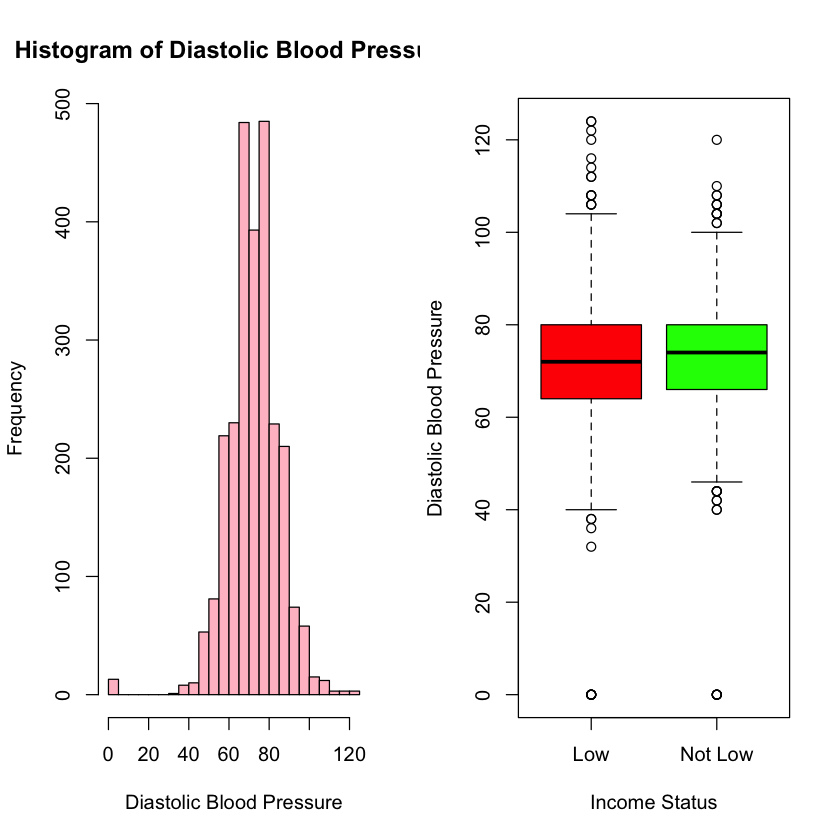

In [28]:
par(mfrow=c(1,2))
# dbp
summary(nhanes_df$DBP1)
hist(nhanes_df$DBP1,breaks = 30, col="pink", main="Histogram of Diastolic Blood Pressure",
    xlab="Diastolic Blood Pressure")

# income
nhanes_df$INCOME_CAT <- ifelse(nhanes_df$INCOME<=2,"Low","Not Low")

# bivariate distribution
summary(nhanes_df$DBP1[nhanes_df$INCOME_CAT == "Low"])
summary(nhanes_df$DBP1[nhanes_df$INCOME_CAT == "Not Low"])

boxplot(DBP1 ~ INCOME_CAT, data=nhanes_df, xlab="Income Status", ylab="Diastolic Blood Pressure", col = c("red", "green"))

2. Subset the data to adults between the ages of 20 and 55. Then, explore how blood pressure varies by age and gender among this age group. Is there a visible trend in blood pressure with increasing age among either sex? 

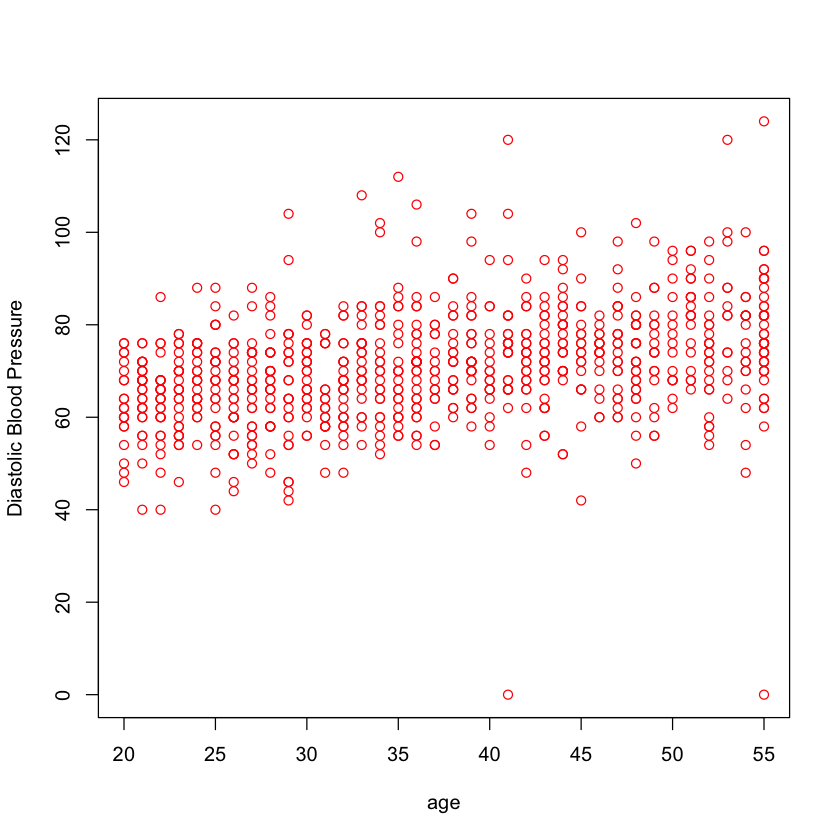

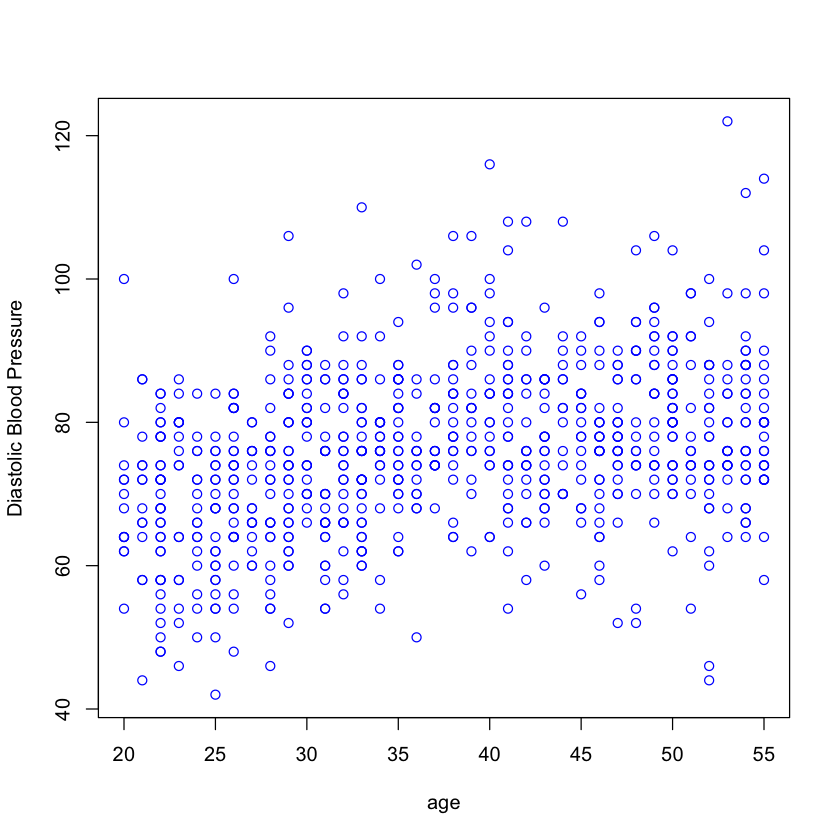

In [29]:
nhanes_df.subset.female <- subset(nhanes_df, 
                              nhanes_df$AGE>=20 & nhanes_df$AGE<=55 & SEX == "Female")
nhanes_df.subset.male <- subset(nhanes_df, 
                              nhanes_df$AGE>=20 & nhanes_df$AGE<=55 & SEX == "Male")
plot(nhanes_df.subset.female$AGE, nhanes_df.subset.female$DBP1, xlab = "age", ylab = "Diastolic Blood Pressure", col = "red")
plot(nhanes_df.subset.male$AGE, nhanes_df.subset.male$DBP1, xlab = "age", ylab = "Diastolic Blood Pressure", col = "blue")

3. For males between the ages of 50-59, compare blood pressure across race as reported in the race column. Then, create a summary table stratified by the `RACE` categories and report the mean, standard deviation, minimum and maximum values for all continuous columns.

Shiny tags cannot be represented in plain text (need html)

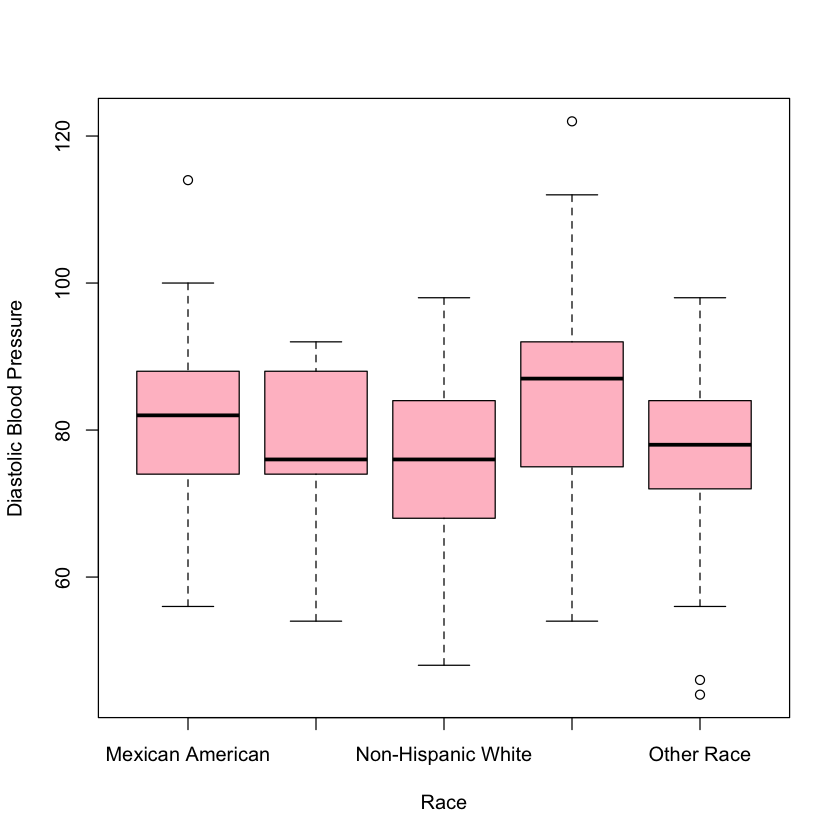

In [30]:
subset.males <- subset(nhanes_df, 
                       nhanes_df$SEX=="Male" & nhanes_df$AGE>=50 & nhanes_df$AGE<=59)
subset.males$RACE <- as.factor(subset.males$RACE)
boxplot(subset.males$DBP1 ~ subset.males$RACE, 
        xlab = "Race", ylab = "Diastolic Blood Pressure", col = "pink")

tbl_summary(subset.males, include= c("SEX", "RACE", "AGE", "EDUCATION", "SMOKE",
                                  "BMI_CAT", "LEAD", "SBP1", "DBP1", "HYP"),
           by = "RACE", statistic = list(all_continuous() ~ "{mean} ({sd}, {min}, {max})")) %>% 
  as_gt() %>% 
  gt:::as.tags.gt_tbl()

4. Recreate the following two plots in R. Based on what you see, how do you expect blood lead levels to change by year? Check your answer to the previous question by plotting these two columns against each other. 

<img src="images/4-exercise4plot1.png" alt= “” width="420pt" align="left">
<img src="images/4-exercise4plot2.png" alt= “” width="420pt" align="right">

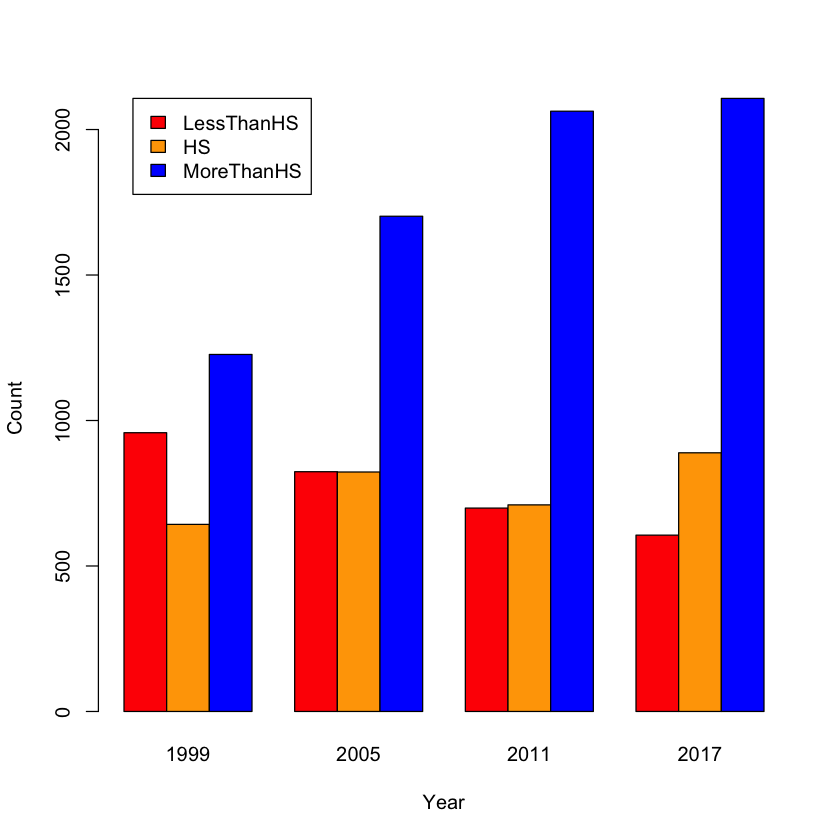

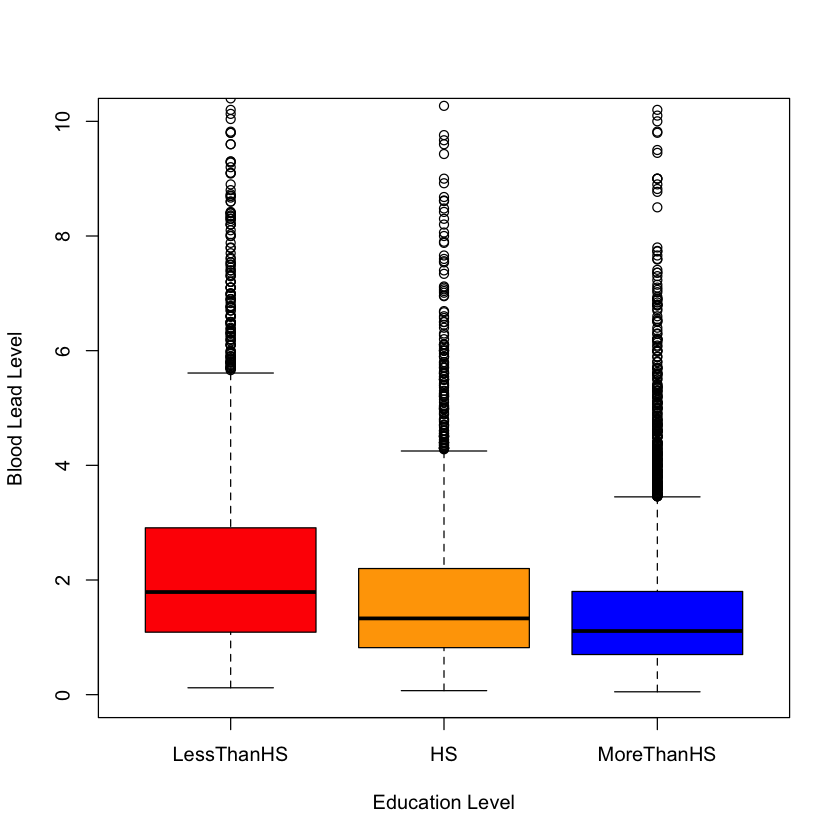

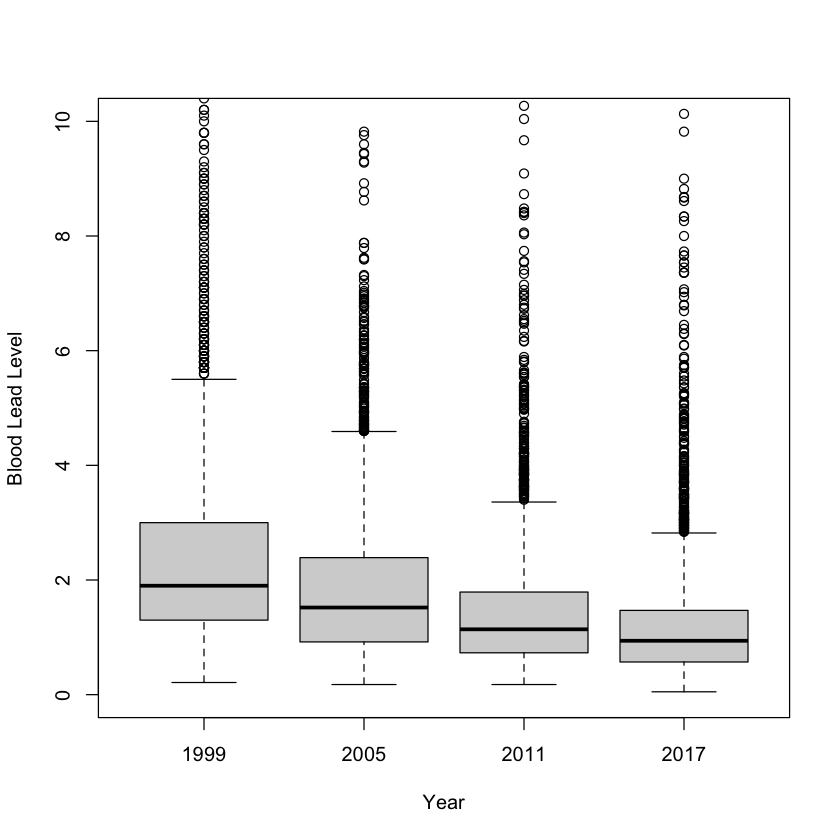

In [31]:
nhanes_subset <- NHANESsample[NHANESsample$YEAR %in% c(1999, 2005, 2011, 2017), ]
ed_year <- table(nhanes_subset$EDUCATION, nhanes_subset$YEAR)
barplot(height = ed_year, 
        beside = TRUE, 
        legend.text = T, 
        col = c("red", "orange", "blue"), 
        args.legend = list(x = "topleft",
                           inset = c(0.05, 0)),
        xlab = "Year",
        ylab = "Count")

boxplot(nhanes_subset$LEAD ~ nhanes_subset$EDUCATION, 
        xlab = "Education Level", 
        ylab = "Blood Lead Level", 
        ylim = c(0, 10), 
        col = c("red", "orange", "blue"))

boxplot(nhanes_subset$LEAD ~ nhanes_subset$YEAR, 
        xlab = "Year", 
        ylab = "Blood Lead Level", 
        ylim = c(0, 10))